In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get dataset

files = [pd.read_csv('./data/enriched_data/' + str(year) + '/week_' + str(week) + '.csv')
         for year in range(2004, 2021)
         for week in range(1, 21)]
games = pd.concat(files)
games = games.sample(frac=1).reset_index(drop=True)

In [3]:
# filter out drawn games

games = games[games['home_team_win'] != 2]

In [4]:
games = games[['home_previous_game', 'away_previous_game', 'is_divisional_game', 'is_dome_game', 'away_distance_travelled',
               'home_score_margin_rank', 'away_score_margin_rank', 'home_pass_yards_margin_rank', 'away_pass_yards_margin_rank',
               'home_pass_yards_margin_reverse_rank', 'away_pass_yards_margin_reverse_rank', 'home_rush_yards_margin_rank',
               'away_rush_yards_margin_rank', 'home_rush_yards_margin_reverse_rank', 'away_rush_yards_margin_reverse_rank', 
               'home_turnovers_margin_rank', 'away_turnovers_margin_rank', 'home_turnovers_margin_reverse_rank',
               'away_turnovers_margin_reverse_rank', 'home_sacks_allowed_margin_rank', 'away_sacks_allowed_margin_rank',
               'home_sacks_allowed_margin_reverse_rank', 'away_sacks_allowed_margin_reverse_rank', 
               'home_penallity_yards_margin_rank', 'away_penallity_yards_margin_rank', 'home_penallity_yards_margin_reverse_rank',
               'away_penallity_yards_margin_reverse_rank', 'home_third_downs_converted_margin_rank',
               'away_third_downs_converted_margin_rank', 'home_third_downs_converted_margin_reverse_rank',
               'away_third_downs_converted_margin_reverse_rank', 'home_fourth_downs_converted_margin_rank',
               'away_fourth_downs_converted_margin_rank', 'home_fourth_downs_converted_margin_reverse_rank',
               'away_fourth_downs_converted_margin_reverse_rank', 'home_time_possession_margin_rank', 
               'away_time_possession_margin_rank', 'home_time_possession_margin_reverse_rank',
               'away_time_possession_margin_reverse_rank', 'home_team_win']]
games.head()

,home_previous_game,away_previous_game,is_divisional_game,is_dome_game,away_distance_travelled,home_score_margin_rank,away_score_margin_rank,home_pass_yards_margin_rank,away_pass_yards_margin_rank,home_pass_yards_margin_reverse_rank,...,away_third_downs_converted_margin_reverse_rank,home_fourth_downs_converted_margin_rank,away_fourth_downs_converted_margin_rank,home_fourth_downs_converted_margin_reverse_rank,away_fourth_downs_converted_margin_reverse_rank,home_time_possession_margin_rank,away_time_possession_margin_rank,home_time_possession_margin_reverse_rank,away_time_possession_margin_reverse_rank,home_team_win
0,0,0,0,1,471,0.018,0.020,0.035,0.015,0.028,...,0.023,0.027,0.033,0.016,0.034,0.031,0.024,0.025,0.023,0
1,1,0,1,0,564,0.023,0.022,0.043,0.023,0.017,...,0.055,0.032,0.059,0.022,0.025,0.021,0.024,0.035,0.042,1
2,0,0,1,0,1375,0.044,0.015,0.036,0.031,0.021,...,0.025,0.014,0.040,0.061,0.026,0.019,0.029,0.039,0.027,1
3,1,1,0,0,468,0.070,0.047,0.055,0.055,0.021,...,0.051,0.036,0.031,0.050,0.055,0.035,0.039,0.031,0.029,1
4,2,2,1,0,608,0.013,0.040,0.016,0.041,0.048,...,0.037,0.044,0.021,0.017,0.034,0.011,0.032,0.055,0.021,0


In [6]:
X = games.iloc[:, :-1]
y = games.iloc[:, -1]

In [7]:
X.head()

,home_previous_game,away_previous_game,is_divisional_game,is_dome_game,away_distance_travelled,home_score_margin_rank,away_score_margin_rank,home_pass_yards_margin_rank,away_pass_yards_margin_rank,home_pass_yards_margin_reverse_rank,...,home_third_downs_converted_margin_reverse_rank,away_third_downs_converted_margin_reverse_rank,home_fourth_downs_converted_margin_rank,away_fourth_downs_converted_margin_rank,home_fourth_downs_converted_margin_reverse_rank,away_fourth_downs_converted_margin_reverse_rank,home_time_possession_margin_rank,away_time_possession_margin_rank,home_time_possession_margin_reverse_rank,away_time_possession_margin_reverse_rank
0,0,0,0,1,471,0.018,0.020,0.035,0.015,0.028,...,0.028,0.023,0.027,0.033,0.016,0.034,0.031,0.024,0.025,0.023
1,1,0,1,0,564,0.023,0.022,0.043,0.023,0.017,...,0.031,0.055,0.032,0.059,0.022,0.025,0.021,0.024,0.035,0.042
2,0,0,1,0,1375,0.044,0.015,0.036,0.031,0.021,...,0.055,0.025,0.014,0.040,0.061,0.026,0.019,0.029,0.039,0.027
3,1,1,0,0,468,0.070,0.047,0.055,0.055,0.021,...,0.043,0.051,0.036,0.031,0.050,0.055,0.035,0.039,0.031,0.029
4,2,2,1,0,608,0.013,0.040,0.016,0.041,0.048,...,0.021,0.037,0.044,0.021,0.017,0.034,0.011,0.032,0.055,0.021


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: home_team_win, dtype: int64

In [9]:
# binary features

binary_features = ['is_divisional_game', 'is_dome_game']

In [10]:
# categorical features

cat_features = ['home_previous_game', 'away_previous_game']

In [11]:
# encode categorical variables first

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
cat_encoder = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'
)

In [14]:
X_encoded = cat_encoder.fit_transform(X)

In [15]:
# split into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
numerical_transformer = ColumnTransformer(
    transformers=[
        ('ss', StandardScaler(), list(range(-35, 0)))
    ],
    remainder='passthrough'
)

In [19]:
# create pipeline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [20]:
pipe = Pipeline([
    ('preprocessing', numerical_transformer),
    ('pca', PCA()),
    ('random_forest', RandomForestClassifier())
])

In [21]:
# transform x_test

X_test[:, 8:] = numerical_transformer.fit_transform(X_test[:, 8:])
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -1.0338215 ,
        -0.65004234,  1.4663081 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.66177528,
        -1.58014408,  1.4663081 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.39265223,
        -0.37101182, -0.09017806],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.58091679,
         1.02414079, -0.57657998],
       [ 1.        ,  0.        ,  0.        , ..., -0.04703699,
        -0.27800165, -0.09017806],
       [ 1.        ,  0.        ,  0.        , ..., -0.49557541,
        -1.02208304,  0.59078464]])

In [ ]:
# tuning hyperparameters

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]

In [29]:
max_features = ['log2', 'sqrt']

In [30]:
max_depth = [int(x) for x in np.linspace(start=1, stop=15, num=15)]

In [31]:
min_samples_split = [int(x) for x in np.linspace(start=2, stop=50, num=10)]

In [32]:
min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=50, num=10)]

In [33]:
bootstrap = [True, False]

In [35]:
param_dist = {
    'pca__n_components': range(12, 35),
    'random_forest__n_estimators': n_estimators,
    'random_forest__max_features': max_features,
    'random_forest__max_depth': max_depth,
    'random_forest__min_samples_split': min_samples_split,
    'random_forest__min_samples_leaf': min_samples_leaf,
    'random_forest__bootstrap': bootstrap
}

In [40]:
rs = RandomizedSearchCV(pipe,
                        param_dist,
                        n_iter=100,
                        cv=5,
                        verbose=1,
                        n_jobs=-1,
                        random_state=0)
rs

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('ss',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
                                                                               [-35,
       

In [41]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('ss',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
                                                                               [-35,
       

In [43]:
rs.best_params_

{'random_forest__n_estimators': 800,
 'random_forest__min_samples_split': 2,
 'random_forest__min_samples_leaf': 50,
 'random_forest__max_features': 'sqrt',
 'random_forest__max_depth': 12,
 'random_forest__bootstrap': True,
 'pca__n_components': 32}

In [46]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_random_forest__n_estimators,param_random_forest__min_samples_split,param_random_forest__min_samples_leaf,param_random_forest__max_features,param_random_forest__max_depth,param_random_forest__bootstrap,param_pca__n_components,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,800,2,50,sqrt,12,True,32,0.684729,0.668719,0.679468,1
1,500,23,39,log2,6,True,17,0.685961,0.669951,0.678729,2
2,900,34,39,log2,7,True,17,0.689655,0.667488,0.678483,3
3,600,23,39,log2,4,True,22,0.693350,0.668719,0.677992,4
4,700,7,28,log2,10,True,18,0.685961,0.666256,0.677745,5
5,600,39,39,log2,6,True,18,0.688424,0.666256,0.677745,6
6,600,12,23,log2,13,True,27,0.689655,0.665025,0.677499,7
7,300,23,23,sqrt,10,True,29,0.690887,0.662562,0.677497,8
8,700,2,7,sqrt,9,True,19,0.681034,0.667488,0.677251,9
9,800,39,39,log2,13,True,12,0.683498,0.665025,0.677006,10


Text(0.5, 1.0, 'bootstrap')

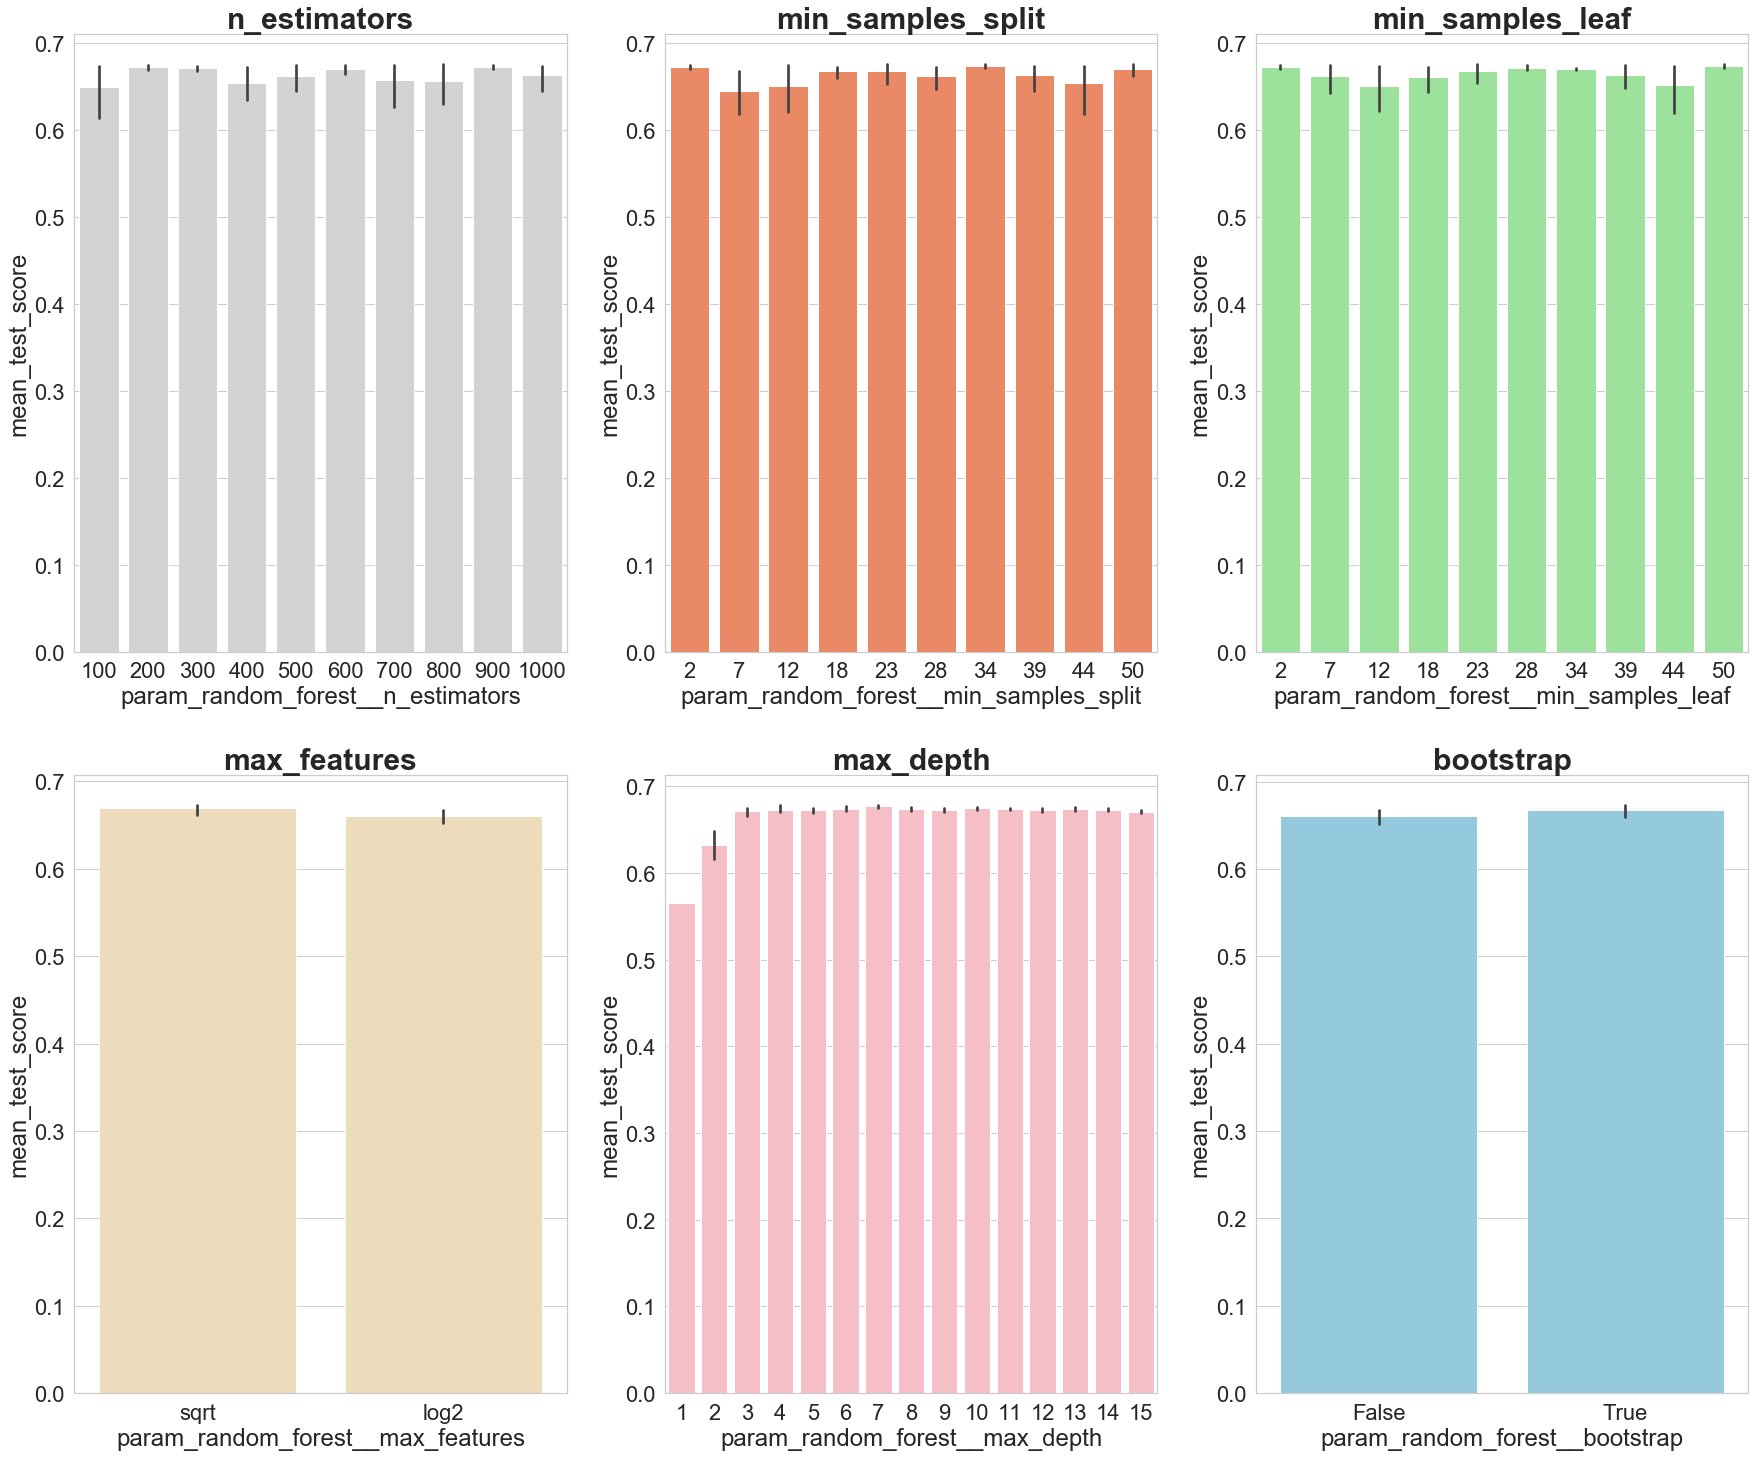

In [48]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style='whitegrid', color_codes=True, font_scale=2)
fig.set_size_inches(30, 25)

sns.barplot(x='param_random_forest__n_estimators', y='mean_test_score', data=rs_df, ax=axs[0, 0], color='lightgray')
# axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_random_forest__min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
# axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_random_forest__min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
# axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_random_forest__max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
# axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_random_forest__max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
# axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_random_forest__bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
# axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

In [49]:
# tuning hyperparameters 2

In [50]:
from sklearn.model_selection import GridSearchCV

In [63]:
n_estimators = [300, 600, 800, 900]

In [64]:
max_features = ['sqrt']

In [65]:
max_depth = [7, 9, 11]

In [66]:
min_samples_split = [2, 18, 24, 32]

In [67]:
min_samples_leaf = [7, 18, 23, 28, 35]

In [68]:
bootstrap = [True]

In [69]:
oob_score = [True]

In [70]:
param_grid = {
    'pca__n_components': range(18, 35),
    'random_forest__n_estimators': n_estimators,
    'random_forest__max_features': max_features,
    'random_forest__max_depth': max_depth,
    'random_forest__min_samples_split': min_samples_split,
    'random_forest__min_samples_leaf': min_samples_leaf,
    'random_forest__bootstrap': bootstrap,
    'random_forest__oob_score': oob_score
}

In [71]:
gs = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
gs

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ss',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         [-35,
                                                                          -34,


In [72]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 4080 candidates, totalling 20400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 6038 tasks      | elapsed: 84.4min
[Parallel(n_jobs=-1)]: Done 7188 tasks      | elapsed: 100.3min
[Parallel(n_jobs=-1)]: Done 8438 tasks      | elapsed: 118.8min
[Parallel(n_jobs=-1)]: Done 9788 tasks      | elapsed: 146.6min
[Parallel(n_jobs=-1)]: Done 11238 tasks    

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ss',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         [-35,
                                                                          -34,


In [84]:
gs.best_score_

0.6821772429546956

In [74]:
gs.best_params_

{'pca__n_components': 29,
 'random_forest__bootstrap': True,
 'random_forest__max_depth': 9,
 'random_forest__max_features': 'sqrt',
 'random_forest__min_samples_leaf': 23,
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 300,
 'random_forest__oob_score': True}

In [75]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ss',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  [-35, -34, -33, -32, -31, -30,
                                                   -29, -28, -27, -26, -25, -24,
                                                   -23, -22, -21, -20, -19, -18,
                                                   -17, -16, -15, -14, -13, -12,
                                                   -11, -10, -9, -8, -7, -6, ...])],
                                   verbos...
     

In [83]:
gs_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
gs_df = gs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
gs_df.head(10)

,param_pca__n_components,param_random_forest__bootstrap,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__min_samples_split,param_random_forest__n_estimators,param_random_forest__oob_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,29,True,9,sqrt,23,2,300,True,0.694581,0.668719,0.682177,1
1,32,True,11,sqrt,23,18,300,True,0.684729,0.661330,0.680943,2
2,19,True,11,sqrt,18,24,900,True,0.688424,0.667488,0.680699,3
3,31,True,11,sqrt,28,32,300,True,0.681034,0.668719,0.680697,4
4,31,True,11,sqrt,35,2,300,True,0.683498,0.666256,0.680452,5
5,31,True,9,sqrt,23,24,300,True,0.678571,0.666256,0.680451,6
6,30,True,9,sqrt,28,2,600,True,0.689655,0.665025,0.680207,7
7,19,True,11,sqrt,18,24,600,True,0.684729,0.668719,0.680206,8
8,22,True,9,sqrt,28,2,300,True,0.692118,0.665025,0.680206,9
9,31,True,9,sqrt,35,32,300,True,0.683498,0.665025,0.680206,10


In [77]:
y_pred = gs.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [79]:
confusion_matrix(y_test, y_pred)

array([[138,  59],
       [ 82, 173]], dtype=int64)

In [80]:
mean_squared_error(y_test, y_pred)

0.31194690265486724

In [82]:
gs.predict_proba(X_test)

array([[0.55446495, 0.44553505],
       [0.56477625, 0.43522375],
       [0.50338078, 0.49661922],
       [0.35495692, 0.64504308],
       [0.58210132, 0.41789868],
       [0.62313787, 0.37686213],
       [0.33974898, 0.66025102],
       [0.63449541, 0.36550459],
       [0.36724585, 0.63275415],
       [0.53567179, 0.46432821],
       [0.36691068, 0.63308932],
       [0.41497505, 0.58502495],
       [0.34137045, 0.65862955],
       [0.62682831, 0.37317169],
       [0.52588486, 0.47411514],
       [0.60885956, 0.39114044],
       [0.51203319, 0.48796681],
       [0.55828176, 0.44171824],
       [0.57478805, 0.42521195],
       [0.32549866, 0.67450134],
       [0.3302718 , 0.6697282 ],
       [0.56746693, 0.43253307],
       [0.58325176, 0.41674824],
       [0.31283483, 0.68716517],
       [0.38022193, 0.61977807],
       [0.29543216, 0.70456784],
       [0.5982527 , 0.4017473 ],
       [0.61018805, 0.38981195],
       [0.34504397, 0.65495603],
       [0.30293081, 0.69706919],
       [0.